In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('House Price Prediction Dataset.csv')
df = df.iloc[:,1:]
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [3]:
df.shape

(2000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [5]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

In [6]:
df[df.duplicated()]  #[]mask

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [7]:
cat = []
num = []
for i in df.columns:
    if df[i].nunique()<10:
        print(i, df[i].nunique(), df[i].unique())
        cat.append(i)
    else:
        num.append(i)

Bedrooms 5 [5 2 4 1 3]
Bathrooms 4 [4 2 1 3]
Floors 3 [3 2 1]
Location 4 ['Downtown' 'Suburban' 'Urban' 'Rural']
Condition 4 ['Excellent' 'Good' 'Fair' 'Poor']
Garage 2 ['No' 'Yes']


In [8]:
num

['Area', 'YearBuilt', 'Price']

In [9]:
cat

['Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition', 'Garage']

In [10]:
vc=df['Bedrooms'].value_counts()
vc

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

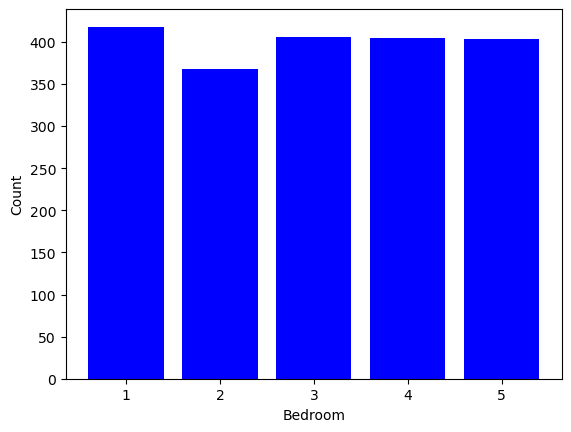

In [11]:
# data is balanced
# x = category 
# height = value
vc = df['Bedrooms'].value_counts()
plt.bar(vc.index, height=vc, color='b')
plt.xlabel('Bedroom')
plt.ylabel('Count')
plt.show()

In [12]:
vc.index  #category wise index

Index([1, 3, 4, 5, 2], dtype='int64', name='Bedrooms')

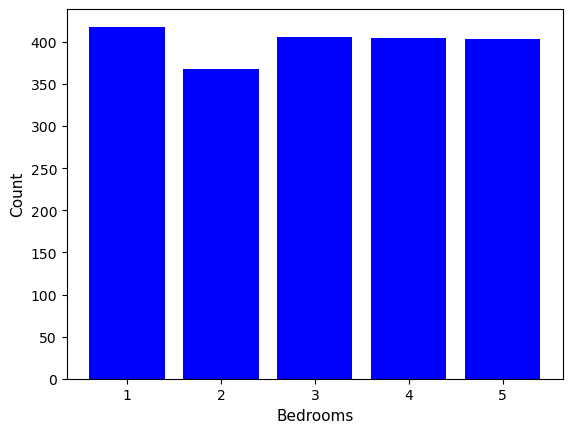

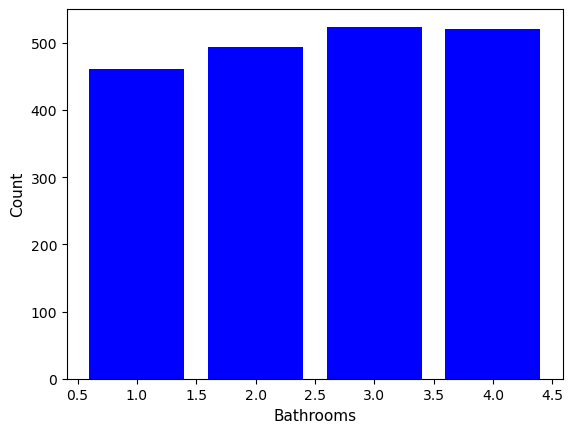

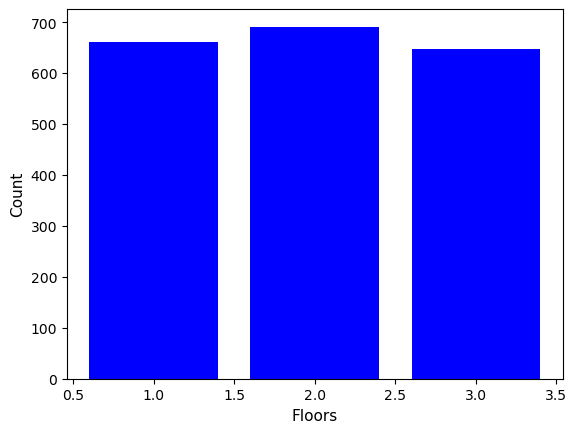

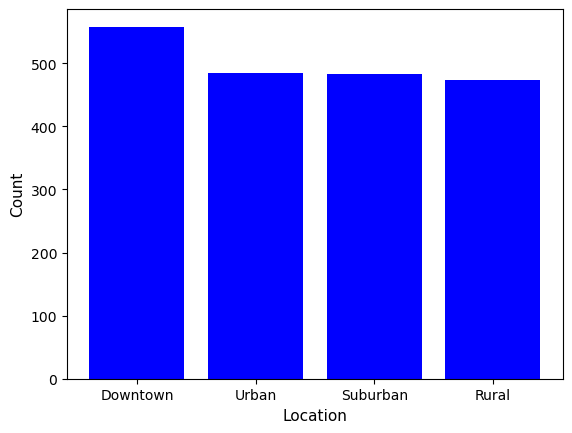

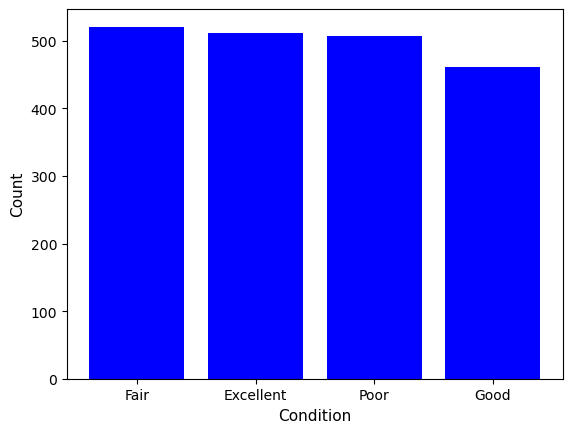

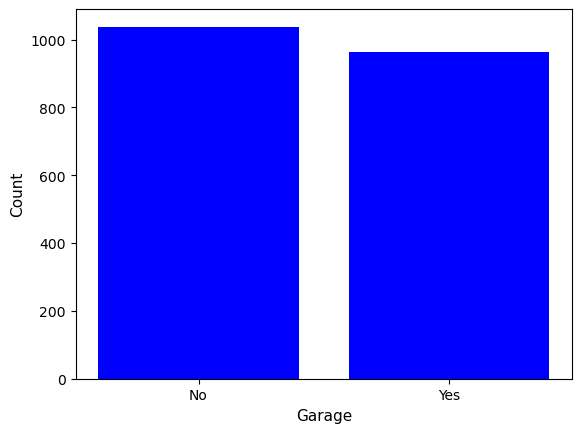

In [13]:
for i in cat:
    vc = df[i].value_counts()
    plt.bar(vc.index, height=vc, color='b')
    plt.xlabel(i, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.show()

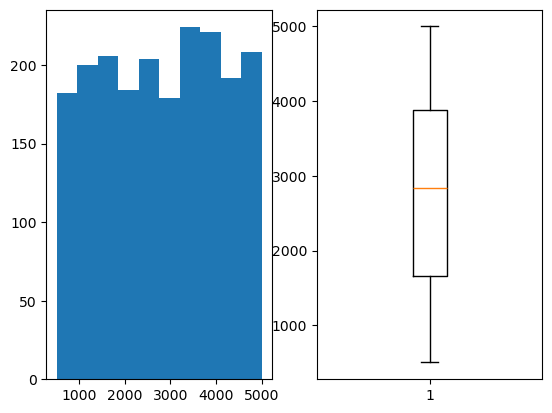

In [14]:
#numerical column
#fig = chart, single frame
fig, ax=plt.subplots(1,2) #1 row, 2 column
ax[0].hist(df['Area'])
ax[1].boxplot(df['Area'])
plt.show()

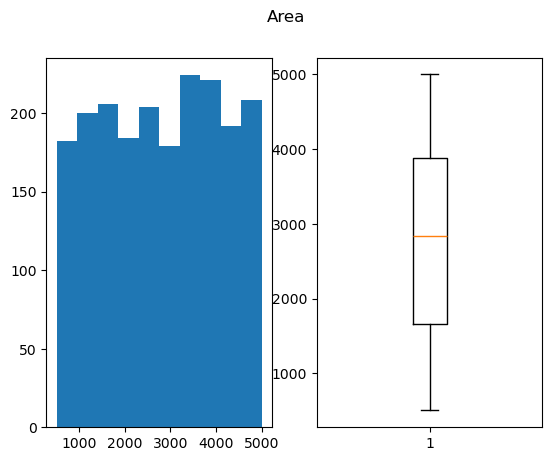

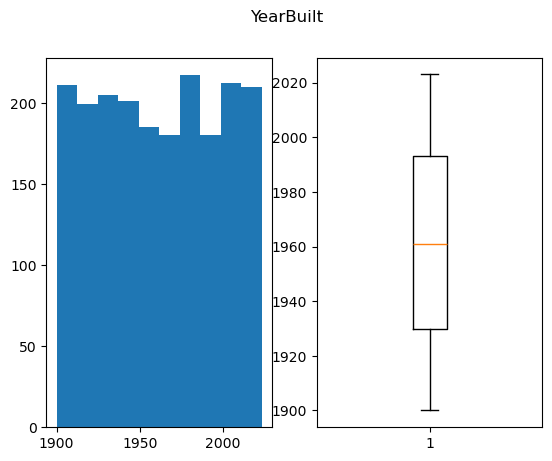

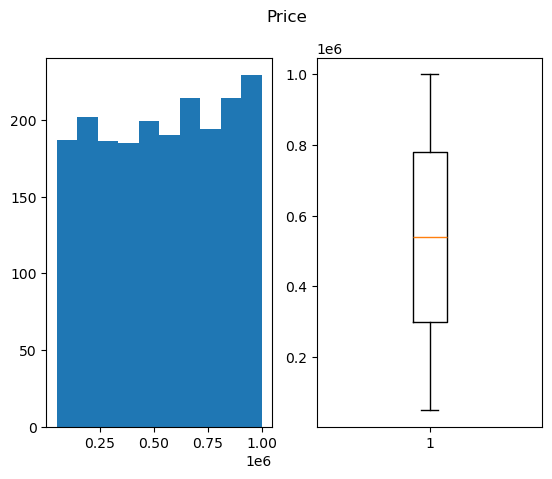

In [15]:
for i in num:
    fig, ax=plt.subplots(1,2) #1 row, 2 column
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    # plt.title(i) -- title for boxplot only
    plt.suptitle(i)
    plt.show()

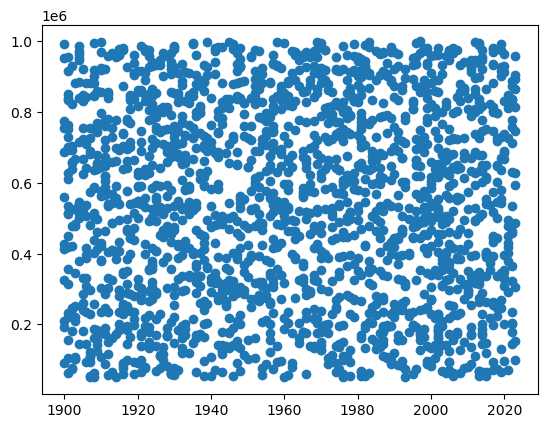

In [16]:
plt.scatter(df['YearBuilt'], df['Price'])

In [ ]:
# simple linear Regression
# cross validation- divide the data in two parts -- training and testing
# over fitting - over confidance training > testing
# under fitting - 50% training , 50% testing
# ratio = 70-30% or 80-20%
# encoding = convert categorical data into numerical data
# Label encoding-- Good = 2, bad=1, worst=0  , for ordinal data

# one hot encoding (OHE)- OHE in machine learning transforms categorical data into a numerical format
# OHE in machine learning transforms categorical data in multiple columns and it represent in the form of 0 and 1
#for Location
#            D   s    u    r
# Downtown   1   0    0    0
# suburban   0   1    0    0
# urban      0   0    1    0
# rural      0   0    0    1

In [18]:
from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder -- function

In [19]:
df['Location']

0       Downtown
1       Downtown
2       Downtown
3       Suburban
4       Downtown
          ...   
1995    Suburban
1996    Suburban
1997       Rural
1998       Urban
1999    Suburban
Name: Location, Length: 2000, dtype: object

In [20]:
ohe = OneHotEncoder(sparse_output = False) #sparse_output long output
locations = ohe.fit_transform(df[['Location']]) #it accept datafame only [['Location']]
locations

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [21]:
ohe.categories_

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [22]:
type(locations)

numpy.ndarray

### after ohe drop one column for multicollinearity

In [24]:
# convert ndarray into dataframe
location_df = pd.DataFrame(locations, columns= ohe.categories_)
location_df = location_df.iloc[:,1:]
location_df

,Rural,Suburban,Urban
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1995,0.0,1.0,0.0
1996,0.0,1.0,0.0
1997,1.0,0.0,0.0
1998,0.0,0.0,1.0


In [25]:
df= pd.concat([df, location_df], axis = 1) #index should be same
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,1.0


In [26]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [27]:
df[['Condition']] = df[['Condition']].replace(to_replace= ['Excellent', 'Good', 'Fair', 'Poor'], value= [3,2,1,0]) 

C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_113824\1089984860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Condition']] = df[['Condition']].replace(to_replace= ['Excellent', 'Good', 'Fair', 'Poor'], value= [3,2,1,0])


In [28]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,Yes,161119,0.0,0.0,1.0


In [29]:
# df[['Condition']] = df[['Condition']].replace(to_replace= ['Excellent', 'Good', 'Fair', 'Poor'], value= [3,2,1,0])
# or
# df[['Condition']].replace(to_replace= ['Excellent', 'Good', 'Fair', 'Poor'], value= [3,2,1,0], inplace=True)

In [30]:
df[['Garage']] = df[['Garage']].replace(to_replace=df['Garage'].unique() , value= [1,0])

C:\Users\hasti.LAPTOP-SLFI7KTT\AppData\Local\Temp\ipykernel_113824\1633379104.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Garage']] = df[['Garage']].replace(to_replace=df['Garage'].unique() , value= [1,0])


In [31]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,1,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,1,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,1,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,0,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,0,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,1,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,0,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,1,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,0,161119,0.0,0.0,1.0


In [32]:
x_df= df.drop(['Location', 'Price'], axis = 1)  #Independent data
y= df['Price'] #dependent data
x_df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,1,0.0,0.0,0.0
1,4272,5,4,3,1958,3,1,0.0,0.0,0.0
2,3592,2,2,3,1938,2,1,0.0,0.0,0.0
3,966,4,2,2,1902,1,0,0.0,1.0,0.0
4,4926,1,4,2,1975,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,1,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,0,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,1,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,0,0.0,0.0,1.0


In [33]:
x = x_df.values    ## convert dataframe into array
y = y.values

In [34]:
x

array([[1.360e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.272e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.592e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.062e+03, 5.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.062e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.989e+03, 5.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [35]:
y

array([149919, 424998, 266746, ..., 476925, 161119, 482525], dtype=int64)

In [36]:
# multi 

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1) #80-20 select data randomly

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 10)
(400, 10)
(1600,)
(400,)


In [39]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)   #relation btw x_rain and y_train
#fit 

LinearRegression()

In [40]:
y_train_pred = lr_model.predict(x_train)  

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [190]:
mse_t = mean_squared_error(y_train_pred, y_train)
rmse_t = mean_squared_error(y_train_pred, y_train)**0.5
mae_t = mean_absolute_error(y_train_pred, y_train)
r2_lin_train = r2_score(y_train, y_train_pred)

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)

75508484181.91669
274788.0713966978
237639.67959139918
0.010234416071005392


In [194]:
y_test_pred = lr_model.predict(x_test)
mse_test = mean_squared_error(y_test_pred, y_test)
rmse_test = mean_squared_error(y_test_pred, y_test)**0.5
mae_test = mean_absolute_error(y_test_pred, y_test)
r2_lin_test = r2_score(y_test, y_test_pred)

In [198]:
print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

77840563198.11737
278999.217199829
240218.60008037777
-0.014735310854600447


In [45]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,1,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,1,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,1,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,0,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,0,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,1,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,0,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,1,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,0,161119,0.0,0.0,1.0


# Assumptions of Liner Regression
1. Multi-collinearity - There should not be any multi collinearity in X, column redundancy.
Because there is relation in between columns then we need to keep only one column, eg. Age and Year columns
X should be non be multi-colinear(columns in X dataframe should not be inter related to each other)
so dropping 'Downtown' column because we have relation between 'rural','urban','suburban' columns
correlation is : If it is 'Downtime' then its not 'rural','urban','suburban'
                 If it is 'Rural' then its not 'Downtime','urban','suburban'
                 If it is 'urban' then its not 'Downtime','rural','rural'
                 If it is 'Suburban' then its not 'Downtime','urban','suburban'
   Hint : After one hot encoding, drop one column which has correlations
2. Linearity : Every independent column must have linear relationship with dependent column(value of independent is increasing and dependent is increasing or decreasing or vice versa)
3. Normality of Residuals : errors must be normally distributed(means error will be close to zero)
4. No auto-correlation : There has to be no auto-correlation between the errors of different predicted values, between the rows(means the error is increading or decreasing for ever predicted value
5. Homoscadasticity(in notebook) : There should be Homoscadasticity. Error should be in constant range.

In [48]:
x_df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,1,0.0,0.0,0.0
1,4272,5,4,3,1958,3,1,0.0,0.0,0.0
2,3592,2,2,3,1938,2,1,0.0,0.0,0.0
3,966,4,2,2,1902,1,0,0.0,1.0,0.0
4,4926,1,4,2,1975,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,1,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,0,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,1,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,0,0.0,0.0,1.0


# Assumptions of linear regression

In [50]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot

def test_linear_regression_assumptions(x, y, x_df):
    """ Testss he key assumptions of linear regression: linearity, independence, homoscedasticity, normality of residuals
    and no multicollinearity
    Parameters:
    x(Dataframe) : Independent variables
    y(Series): Dependent variable
    
    Returns:
    None
    """

    # Add constant to x for intercept
    x = sm.add_constant(x)

    #Fit the OLS model
    ols_model =  sm.OLS(y,x).fit()
    residuals = ols_model.resid
    predicted_values = ols_model.fittedvalues

    # 1. Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='Red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("esiduals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomaly scatteres aroubd 0. Non-random patterns indicate non-linearity")

    # 2. No Autocorrelation: Independence of Errors
    print("2. Independence of Errors (Durbin-Waston Test):\n")
    dw_stat = durbin_watson(residuals)
    print(f"Durin-Waston statistic: {dw_stat}")
    if 1.5<=dw_stat<=2.5:
        print("Residuals appear to be independent (No autocorrelation).\n")
    else:
        print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

    # 3. Homoscedasticity
    print("3. Homoscedasticity (Breusch-Pagan Test): \n")
    bp_test = het_breuschpagan(residuals, x)
    print(f"Lagrange Multiplier Staistic: {bp_test[0]}")
    print(f"p-value: {bp_test[1]}")
    if bp_test[1] >0.05:
        print("Residuals have constant variance(Homoscedasticity).\n")
    else:
        print("Residuals do not ave constant variance (Heteroscedasticity). Consider GLS or transformation.\n")

    # 4. Normality of Errors
    print("4. Normality of Errors:\n")
    sns.histplot(residuals, kde=True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue>0.05:
        print("Residuals re normally distributed.\n")
    else:
        print("Residuals are not normally distributed. Consider transformation or robust regression.\n")

    # 5. Multicollinearity
    print("5. Multicollinearity (Variance Inflation Factor): \n")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_df.columns
    vif_data["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
    print(vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
    else:
        print("No significant multicollinearity detected.\n")



1. Linearity:



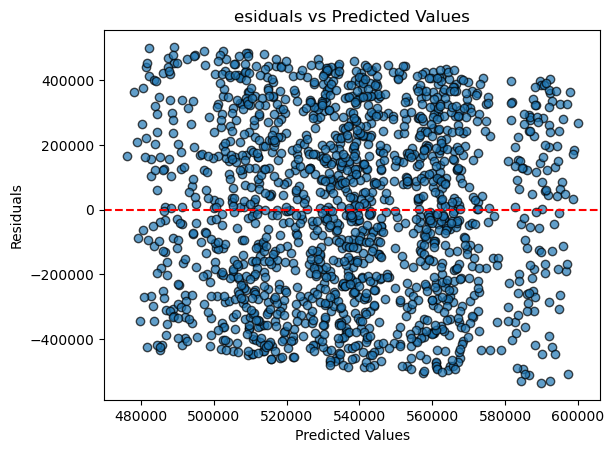

Check if the residuals are randomaly scatteres aroubd 0. Non-random patterns indicate non-linearity
2. Independence of Errors (Durbin-Waston Test):

Durin-Waston statistic: 2.0480289730305343
Residuals appear to be independent (No autocorrelation).

3. Homoscedasticity (Breusch-Pagan Test): 

Lagrange Multiplier Staistic: 11.875784484039897
p-value: 0.29345583023451477
Residuals have constant variance(Homoscedasticity).

4. Normality of Errors:



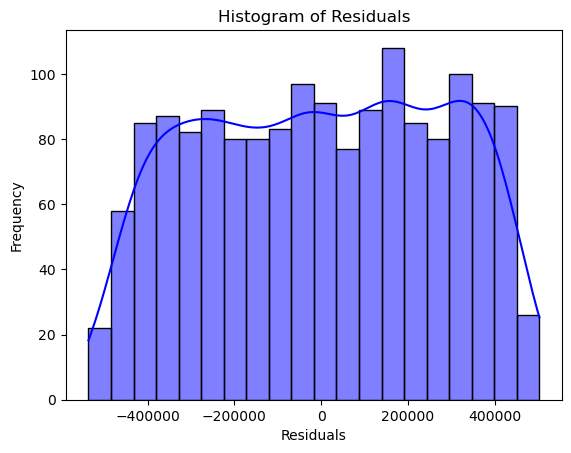

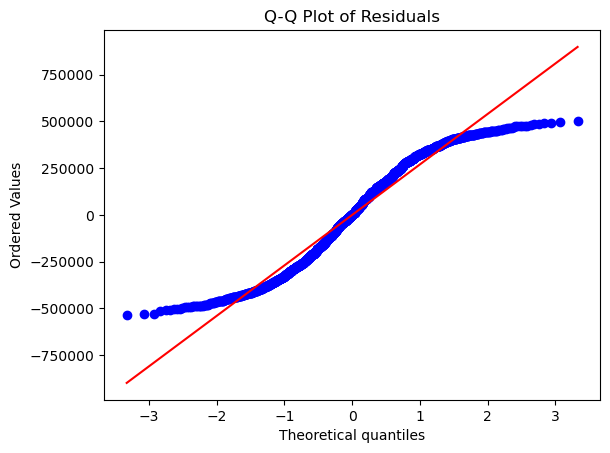

Shapiro-Wilk Test p-value: 4.5744129188223475e-21
Residuals are not normally distributed. Consider transformation or robust regression.

5. Multicollinearity (Variance Inflation Factor): 

       Feature        VIF
0         Area   5.637499
1     Bedrooms   5.462243
2    Bathrooms   6.303486
3       Floors   7.069040
4    YearBuilt  25.988084
5    Condition   2.753289
6       Garage   2.091085
7     (Rural,)   1.852293
8  (Suburban,)   1.866693
9     (Urban,)   1.868663
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [51]:
test_linear_regression_assumptions(x_train, y_train, x_df)

# Polynomial Regression - 
### creating new PolynomialFeatures
### squared values

In [125]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly= PolynomialFeatures(degree=10)
x_poly_train= poly.fit_transform(x_train)
x_poly_test= poly.transform(x_test) # apply learning on x_text

In [128]:
x_train[0]

array([1.36e+03, 5.00e+00, 4.00e+00, 3.00e+00, 1.97e+03, 3.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00])

In [129]:
x_poly_train[0]  #PolynomialFeatures

array([1.00e+00, 1.36e+03, 5.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00])

In [134]:
poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_poly_pred = poly_model.predict(x_poly_train)  #relation btw x_poly_train and y_poly-train
y_poly_pred

array([407364.01519717, 250894.11995447, 301882.23967493, ...,
       422722.58490504, 383825.46517313, 970008.13347376])

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_poly_train = mean_squared_error(y_poly_pred, y_train)
rmse_poly_train = mean_squared_error(y_poly_pred, y_train)**0.5
mae_poly_train = mean_absolute_error(y_poly_pred, y_train)
r2_poly_train= r2_score(y_train, y_poly_pred)
# r2_score 0 to 1
# r2_score= goodness of fit
print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_poly_train)

75508484181.91669
274788.0713966978
237639.67959139918
0.5982403443977298


In [202]:
# r2_score
# test

In [204]:
y_poly_test_pred = poly_model.predict(x_poly_test)
mse_test = mean_squared_error(y_poly_test_pred, y_test)
rmse_poly_test = mean_squared_error(y_poly_test_pred, y_test)**0.5
mae_poly_test = mean_absolute_error(y_poly_test_pred, y_test)
r2_poly_train= r2_score(y_test,y_poly_test_pred)
print(mse_test)
print(rmse_poly_test)
print(mae_poly_test)
print(r2_poly_train)

1013433584612.8647
1006694.3849117589
527654.2009179876
-12.211194796924326


# Regularisation: LASSO= cf  + lambda*b

In [208]:
# if r2_score is > 0.9 on training and 
#r2_score > 0.6 or 0.5 on testing , do regularisation
# Regularisation: LASSO -- add error in cf
# it is used in the case of overfitting (reduce the overftting)
# model is wokinng good on training data, but not working well on testing data
# Regularisation -- model will work on known as well as unknown data ---- cf(cost function) = 0 + lambda*bi^2 (adding errors)
# 0 = no error,   thoda errors hova joiae, accuracy 100% n hovi joiae
# b0, b1,b2 -- coefficent variance
# LASSO - introduce the error and je features imp nathi aeni impotance haji ochi kari devanu
# if you have less no. of columns use Lasso
from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= Lasso(alpha=1.0)  # alpha = lambda
l1.fit(x_train, y_train)
y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train= mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train= mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train= r2_score(y_train, y_pred_train_l1)

print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

75508484205.26399
274788.0714391802
237639.7276568684
0.01023441576496864


# Regularisation: RIDGE = 0 + lambda*bi^2

In [156]:
# y = b0+b1x1+b2x2+b3x3
# Regularisation: Ridge = cf + lambda*b
# Ridge - if some column is less important ridge will cancel out that column 
# if you have more no. of columns use Ridge

from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= Ridge(alpha=1.0)  # alpha = lambda
l1.fit(x_train, y_train)
y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train= mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train= mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train= r2_score(y_train, y_pred_train_l1)  # actual - predicted

print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

75508486630.35645
274788.0758518398
237640.97387122686
0.01023438397684484


# ElasticNet Regressar

In [154]:
# ElasticNet is a combination of Lasso and Ridge 
# l1_ratio= it will tell how much % of lasso and ridge 

from sklearn.linear_model import Lasso, Ridge, ElasticNet
l1= ElasticNet(alpha=1.0, l1_ratio=0.6)  # alpha = lambda
l1.fit(x_train, y_train)
y_pred_train_l1 = l1.predict(x_train)

mse_l1_train = mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train= mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train= mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train= r2_score(y_train, y_pred_train_l1)

print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

75677973797.30779
275096.2991341537
238236.5714303747
0.008012745354595396


# K-Nearest Neighbors regressar

In [215]:
# knn(K-Nearest Neighbors) regressar
# finds closer value and make predictions 
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train, y_train)
y_train_knn = knn_r.predict(x_train)

mse_knn_train = mean_squared_error(y_train_knn, y_train)
rmse_knn_train= mean_squared_error(y_train_knn, y_train)**0.5
mae_knn_train= mean_absolute_error(y_train_knn, y_train)
r2_knn_train= r2_score(y_train, y_train_knn)

print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)

60851692165.16078
246681.3575549656
207194.41762500003
0.20235571828176302


# Support Vector Regression (SVR)

In [182]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_train_svr = svr.predict(x_train)

mse_svr_train = mean_squared_error(y_train_svr, y_train)
rmse_svr_train= mean_squared_error(y_train_svr, y_train)**0.5
mae_svr_train= mean_absolute_error(y_train_svr, y_train)
r2_svr_train= r2_score(y_train, y_train_svr)

print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

76289468627.51158
276205.48261667724
239215.7911497912
-2.7319026103533872e-06


# Decision treee regression

In [225]:
# Decision treee regression
# max_depth vadhare to error ochu and max_depth ochu to error vadhare
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3, random_state = 0)
dtree.fit(x_train, y_train)
y_train_dtree = dtree.predict(x_train)

mse_dtree_train = mean_squared_error(y_train_dtree, y_train)
rmse_dtree_train= mean_squared_error(y_train_dtree, y_train)**0.5
mae_dtree_train= mean_absolute_error(y_train_dtree, y_train)
r2_dtree_train= r2_score(y_train, y_train_dtree)

print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

74356178641.75859
272683.2936609036
235356.9078410039
0.02533884278776266


In [227]:
y_test_dtree = dtree.predict(x_test)

mse_dtree_test = mean_squared_error(y_test_dtree, y_test)
rmse_dtree_test= mean_squared_error(y_test_dtree, y_test)**0.5
mae_dtree_test= mean_absolute_error(y_test_dtree, y_test)
r2_dtree_test= r2_score(y_test, y_test_dtree)

print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)

80952076348.75113
284520.78368504316
244189.08712179027
-0.05529722529117165


In [ ]:
# errors will be introduced in linear models only